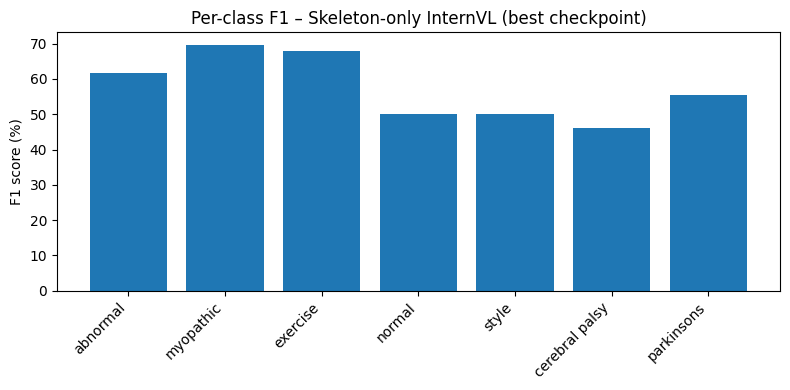

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = [
    "abnormal",
    "myopathic",
    "exercise",
    "normal",
    "style",
    "cerebral palsy",
    "parkinsons",
]

f1_scores = np.array([
    61.64,
    69.70,
    67.92,
    50.00,
    50.00,
    46.15,
    55.56,
])

plt.figure(figsize=(8, 4))
plt.bar(classes, f1_scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel("F1 score (%)")
plt.title("Per-class F1 – Skeleton-only InternVL (best checkpoint)")
plt.tight_layout()
plt.show()

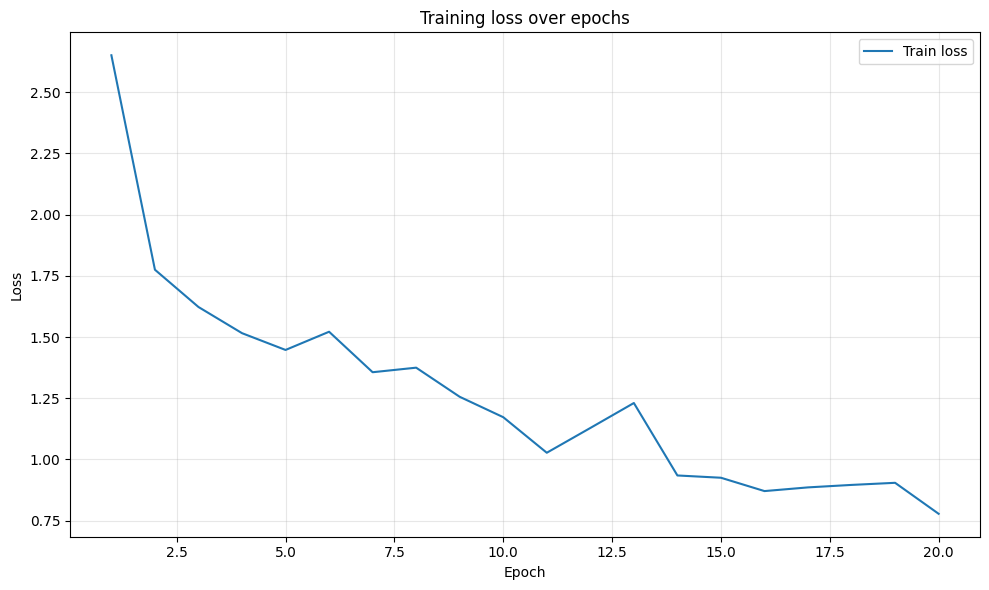

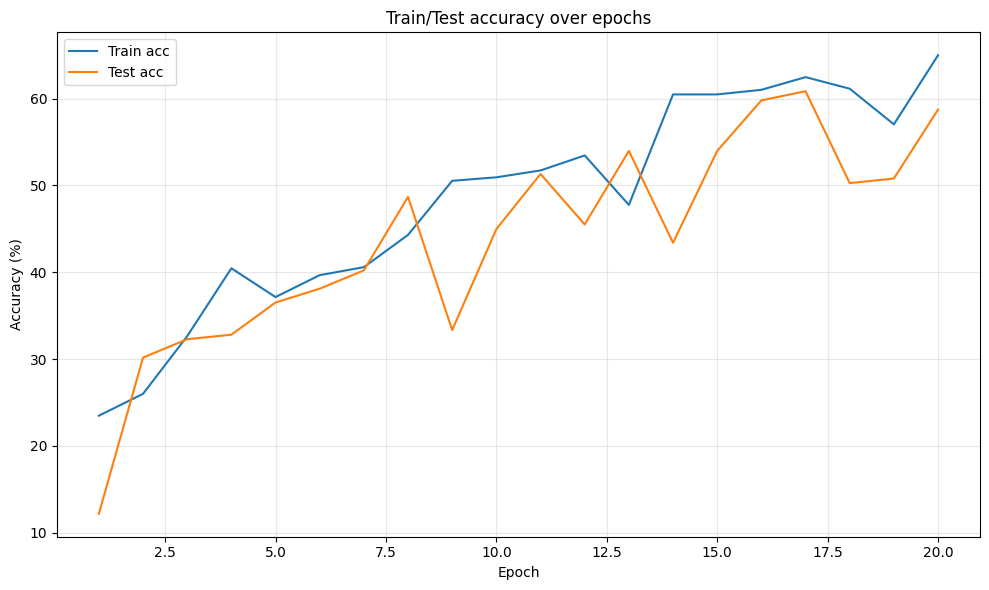

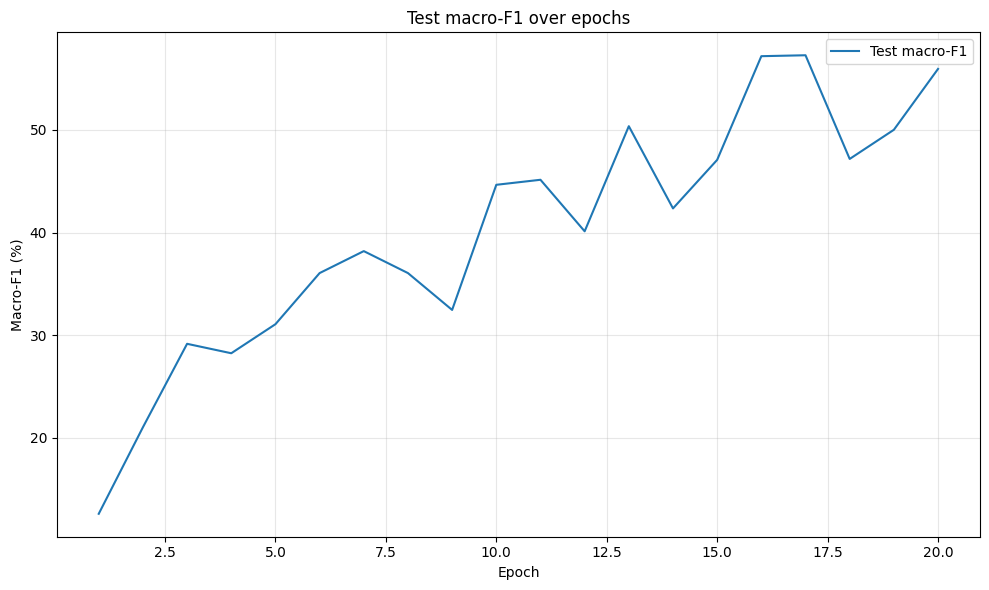

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Hard-coded training history from terminal logs (epochs 1-20)
train_loss = [
    2.6512, 1.7750, 1.6227, 1.5158, 1.4472,
    1.5216, 1.3562, 1.3748, 1.2558, 1.1725,
    1.0272, 1.1284, 1.2304, 0.9344, 0.9251,
    0.8706, 0.8857, 0.8958, 0.9044, 0.7778,
]

train_acc = [
    23.47, 25.99, 32.63, 40.45, 37.14,
    39.66, 40.58, 44.30, 50.53, 50.93,
    51.72, 53.45, 47.75, 60.48, 60.48,
    61.01, 62.47, 61.14, 57.03, 64.99,
]

test_acc = [
    12.17, 30.16, 32.28, 32.80, 36.51,
    38.10, 40.21, 48.68, 33.33, 44.97,
    51.32, 45.50, 53.97, 43.39, 53.97,
    59.79, 60.85, 50.26, 50.79, 58.73,
]

macro_f1 = [
    12.61, 21.04, 29.17, 28.25, 31.08,
    36.06, 38.20, 36.06, 32.47, 44.66,
    45.15, 40.13, 50.37, 42.36, 47.09,
    57.19, 57.28, 47.18, 50.02, 55.95,
]

epochs = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Train loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training loss over epochs")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label="Train acc")
plt.plot(epochs, test_acc, label="Test acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Train/Test accuracy over epochs")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, macro_f1, label="Test macro-F1")
plt.xlabel("Epoch")
plt.ylabel("Macro-F1 (%)")
plt.title("Test macro-F1 over epochs")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


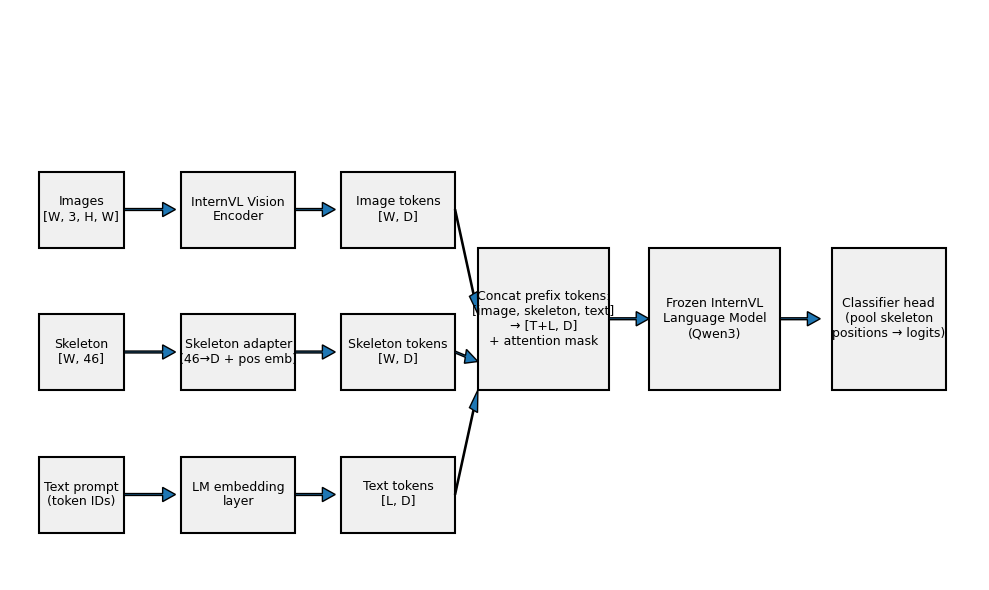

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow

fig, ax = plt.subplots(figsize=(11, 6))
ax.axis("off")

# Colors
FROZEN_COLOR = "#d0e7ff"    # light blue
TRAINABLE_COLOR = "#ffe0b3"  # light orange
NEUTRAL_COLOR = "#f0f0f0"    # grey

# Helper to draw a rounded box
def rbox(x, y, w, h, text, color):
    rect = FancyBboxPatch(
        (x, y), w, h,
        boxstyle="round,pad=0.2",
        linewidth=1.5,
        edgecolor="black",
        facecolor=color,
    )
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=9, wrap=True)

# Inputs (neutral)
rbox(0.5, 3.5, 1.8, 0.8, "Images\n[W, 3, H, W]", NEUTRAL_COLOR)
rbox(0.5, 2.0, 1.8, 0.8, "Skeleton\n[W, 46]", NEUTRAL_COLOR)
rbox(0.5, 0.5, 1.8, 0.8, "Text prompt\n(token IDs)", NEUTRAL_COLOR)

# Image path (frozen vision encoder)
rbox(3.0, 3.5, 2.2, 0.8, "InternVL Vision\nEncoder\n(frozen)", FROZEN_COLOR)
rbox(5.8, 3.5, 2.0, 0.8, "Image tokens\n[W, D]", NEUTRAL_COLOR)

# Skeleton path (trainable adapter)
rbox(3.0, 2.0, 2.2, 0.8, "Skeleton adapter\n(46→D + pos emb)\n(trainable)", TRAINABLE_COLOR)
rbox(5.8, 2.0, 2.0, 0.8, "Skeleton tokens\n[W, D]", NEUTRAL_COLOR)

# Text path (frozen embedding layer)
rbox(3.0, 0.5, 2.2, 0.8, "LM embedding\nlayer\n(frozen)", FROZEN_COLOR)
rbox(5.8, 0.5, 2.0, 0.8, "Text tokens\n[L, D]", NEUTRAL_COLOR)

# Fusion + LM + classifier
rbox(8.2, 2.0, 3.0, 1.5, "Concat prefix tokens:\n[image, skeleton, text]\n→ [T+L, D]\n+ attention mask", NEUTRAL_COLOR)
rbox(11.8, 2.0, 2.3, 1.5, "Frozen InternVL\nLanguage Model\n(Qwen3)", FROZEN_COLOR)
rbox(14.7, 2.0, 2.2, 1.5, "Classifier head\n(trainable)\n(pool skeleton\npositions → logits)", TRAINABLE_COLOR)

# Arrows from inputs to modules
ax.add_patch(FancyArrow(2.3, 3.9, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # image → vision
ax.add_patch(FancyArrow(2.3, 2.4, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # skeleton → adapter
ax.add_patch(FancyArrow(2.3, 0.9, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # text → emb

# Arrows along paths
ax.add_patch(FancyArrow(5.2, 3.9, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # vision → img tokens
ax.add_patch(FancyArrow(5.2, 2.4, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # adapter → skel tokens
ax.add_patch(FancyArrow(5.2, 0.9, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # emb → text tokens

# Arrows into fusion
ax.add_patch(FancyArrow(7.8, 3.9, 0.4, -1.1, width=0.02, head_width=0.15, length_includes_head=True))  # img → fusion
ax.add_patch(FancyArrow(7.8, 2.4, 0.4, -0.1, width=0.02, head_width=0.15, length_includes_head=True))  # skel → fusion
ax.add_patch(FancyArrow(7.8, 0.9, 0.4, 1.1, width=0.02, head_width=0.15, length_includes_head=True))  # text → fusion

# Fusion → LM → classifier
ax.add_patch(FancyArrow(11.2, 2.75, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))
ax.add_patch(FancyArrow(14.1, 2.75, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))

ax.set_xlim(0, 18)
ax.set_ylim(0, 6)
plt.tight_layout()
plt.show()


C:\Users\1nkas-Strix-4090-ll\AppData\Local\Temp\ipykernel_31532\3562218359.py:60: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1nkas-Strix-4090-ll\AppData\Local\Temp\ipykernel_31532\3562218359.py:60: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\1nkas-Strix-4090-ll\miniconda3\envs\internvl-gait\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\1nkas-Strix-4090-ll\miniconda3\envs\internvl-gait\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


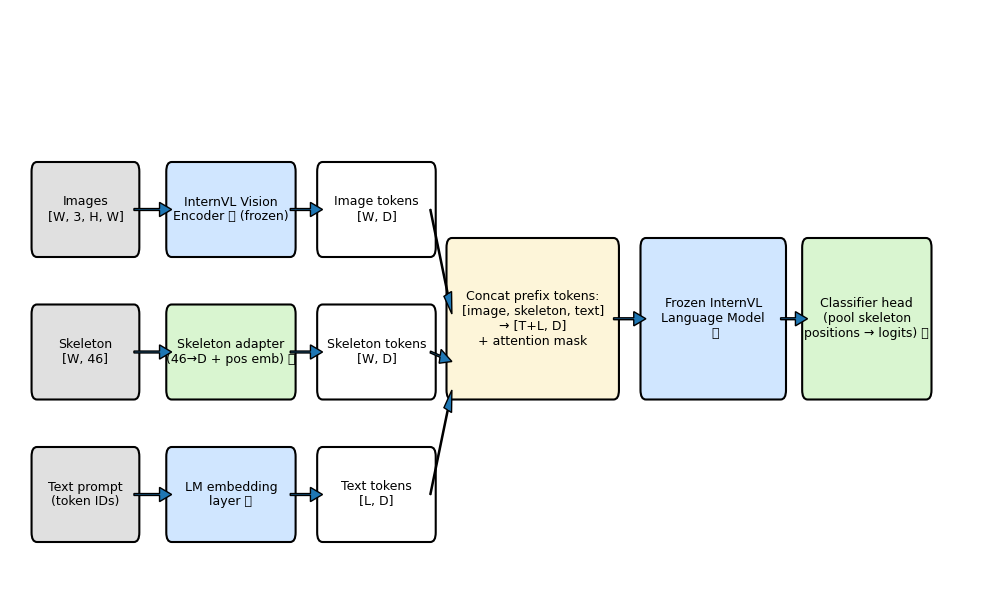

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")

# Helper to draw a rounded box with color and emoji label
def box(x, y, w, h, text, facecolor="#f0f0f0"):
    rect = FancyBboxPatch(
        (x, y), w, h,
        boxstyle="round,pad=0.1", linewidth=1.5,
        edgecolor="black", facecolor=facecolor,
    )
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=9, wrap=True)

# Inputs (gray)
box(0.5, 3.5, 1.8, 0.8, "Images\n[W, 3, H, W]", facecolor="#e0e0e0")
box(0.5, 2.0, 1.8, 0.8, "Skeleton\n[W, 46]", facecolor="#e0e0e0")
box(0.5, 0.5, 1.8, 0.8, "Text prompt\n(token IDs)", facecolor="#e0e0e0")

# Image path (frozen 🧊)
box(3.0, 3.5, 2.2, 0.8, "InternVL Vision\nEncoder 🧊 (frozen)", facecolor="#d0e6ff")
box(5.8, 3.5, 2.0, 0.8, "Image tokens\n[W, D]", facecolor="#ffffff")

# Skeleton path (trainable 🟢)
box(3.0, 2.0, 2.2, 0.8, "Skeleton adapter\n(46→D + pos emb) 🟢", facecolor="#d9f5d0")
box(5.8, 2.0, 2.0, 0.8, "Skeleton tokens\n[W, D]", facecolor="#ffffff")

# Text path (frozen LM embeddings)
box(3.0, 0.5, 2.2, 0.8, "LM embedding\nlayer 🧊", facecolor="#d0e6ff")
box(5.8, 0.5, 2.0, 0.8, "Text tokens\n[L, D]", facecolor="#ffffff")

# Fusion + LM + classifier
box(8.2, 2.0, 3.0, 1.5, "Concat prefix tokens:\n[image, skeleton, text]\n→ [T+L, D]\n+ attention mask", facecolor="#fdf5d9")
box(11.8, 2.0, 2.5, 1.5, "Frozen InternVL\nLanguage Model\n 🧊", facecolor="#d0e6ff")
box(14.8, 2.0, 2.2, 1.5, "Classifier head\n(pool skeleton\npositions → logits) 🟢", facecolor="#d9f5d0")

# Arrows from inputs to modules
ax.add_patch(FancyArrow(2.3, 3.9, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # image → vision
ax.add_patch(FancyArrow(2.3, 2.4, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # skeleton → adapter
ax.add_patch(FancyArrow(2.3, 0.9, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # text → emb

# Arrows along paths
ax.add_patch(FancyArrow(5.2, 3.9, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # vision → img tokens
ax.add_patch(FancyArrow(5.2, 2.4, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # adapter → skel tokens
ax.add_patch(FancyArrow(5.2, 0.9, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # emb → text tokens

# Arrows into fusion
ax.add_patch(FancyArrow(7.8, 3.9, 0.4, -1.1, width=0.02, head_width=0.15, length_includes_head=True))  # img → fusion
ax.add_patch(FancyArrow(7.8, 2.4, 0.4, -0.1, width=0.02, head_width=0.15, length_includes_head=True))  # skel → fusion
ax.add_patch(FancyArrow(7.8, 0.9, 0.4, 1.1, width=0.02, head_width=0.15, length_includes_head=True))  # text → fusion

# Fusion → LM → classifier
ax.add_patch(FancyArrow(11.2, 2.75, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))
ax.add_patch(FancyArrow(14.3, 2.75, 0.5, 0.0, width=0.02, head_width=0.15, length_includes_head=True))

ax.set_xlim(0, 18)
ax.set_ylim(0, 6)
plt.tight_layout()
plt.show()


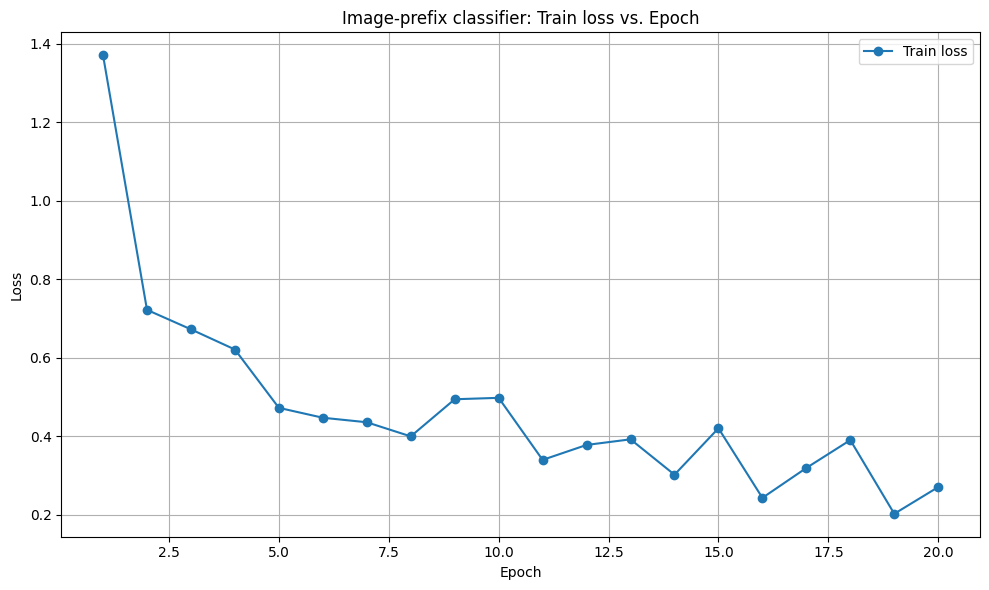

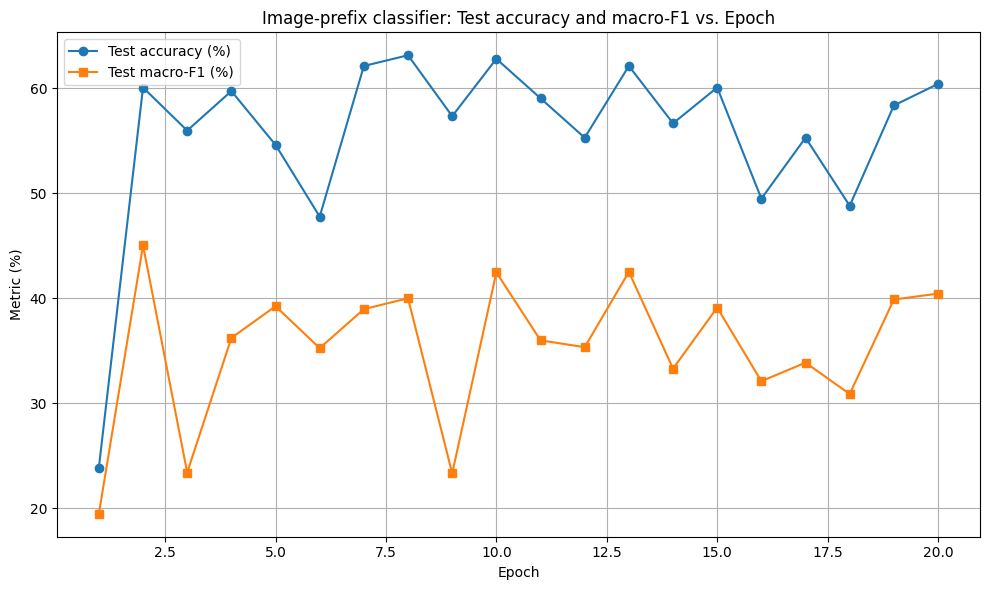

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Epoch indices 1..20
epochs = np.arange(1, 21)

# From your console log (image-prefix-only run)
train_loss = [
    1.3709, 0.7223, 0.6727, 0.6213, 0.4727,
    0.4475, 0.4360, 0.4000, 0.4946, 0.4982,
    0.3401, 0.3782, 0.3925, 0.3024, 0.4207,
    0.2434, 0.3196, 0.3906, 0.2028, 0.2709,
]

test_acc = [  # in %
    23.89, 60.07, 55.97, 59.73, 54.61,
    47.78, 62.12, 63.14, 57.34, 62.80,
    59.04, 55.29, 62.12, 56.66, 60.07,
    49.49, 55.29, 48.81, 58.36, 60.41,
]

test_macro_f1 = [  # in %
    19.49, 45.04, 23.42, 36.23, 39.25,
    35.26, 38.97, 40.01, 23.34, 42.47,
    36.00, 35.35, 42.52, 33.31, 39.12,
    32.11, 33.88, 30.89, 39.89, 40.45,
]

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Image-prefix classifier: Train loss vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, test_acc, marker='o', label='Test accuracy (%)')
plt.plot(epochs, test_macro_f1, marker='s', label='Test macro-F1 (%)')
plt.xlabel('Epoch')
plt.ylabel('Metric (%)')
plt.title('Image-prefix classifier: Test accuracy and macro-F1 vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

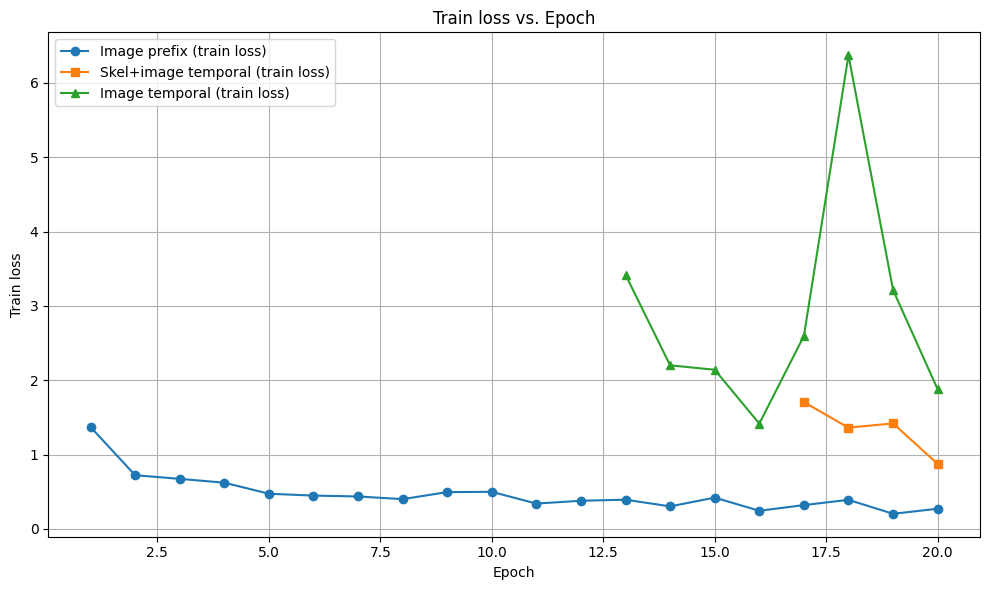

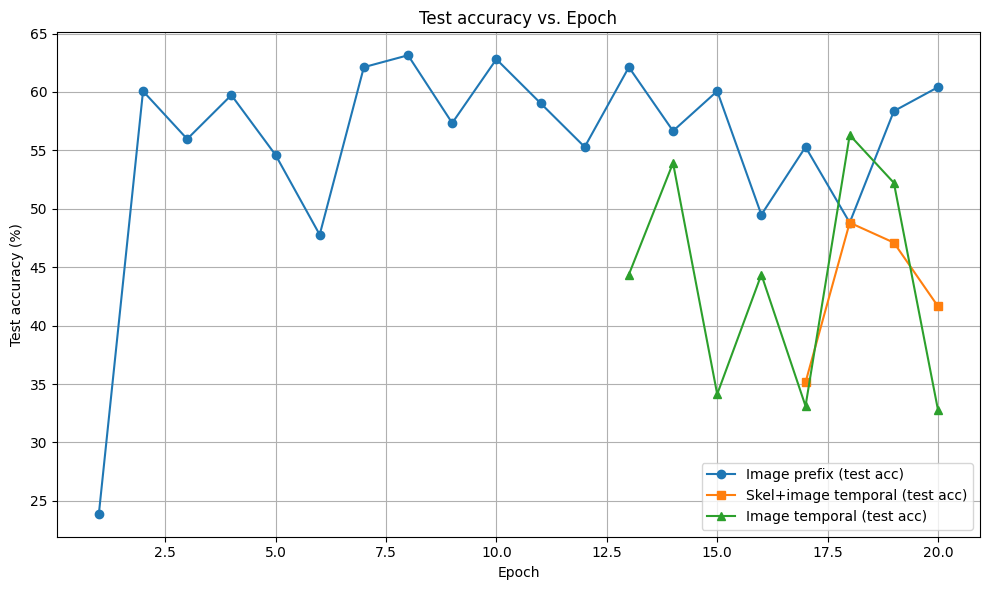

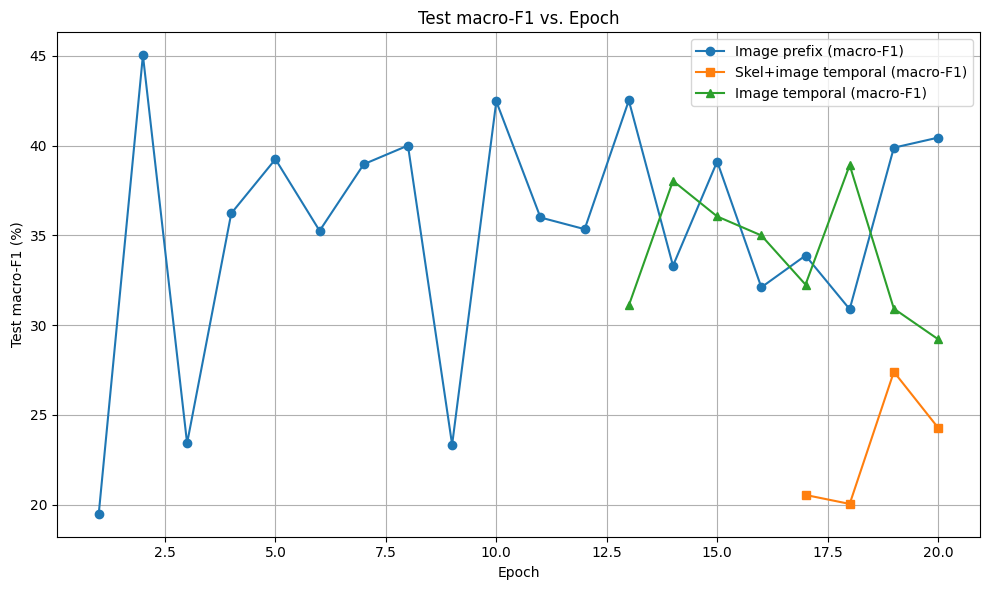

In [2]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, 21)

# ========= 1) IMAGE PREFIX ONLY (image + text, prefix into LLM) =========
img_prefix_train_loss = [
    1.3709, 0.7223, 0.6727, 0.6213, 0.4727,
    0.4475, 0.4360, 0.4000, 0.4946, 0.4982,
    0.3401, 0.3782, 0.3925, 0.3024, 0.4207,
    0.2434, 0.3196, 0.3906, 0.2028, 0.2709,
]

img_prefix_test_acc = [  # %
    23.89, 60.07, 55.97, 59.73, 54.61,
    47.78, 62.12, 63.14, 57.34, 62.80,
    59.04, 55.29, 62.12, 56.66, 60.07,
    49.49, 55.29, 48.81, 58.36, 60.41,
]

img_prefix_test_macro_f1 = [  # %
    19.49, 45.04, 23.42, 36.23, 39.25,
    35.26, 38.97, 40.01, 23.34, 42.47,
    36.00, 35.35, 42.52, 33.31, 39.12,
    32.11, 33.88, 30.89, 39.89, 40.45,
]

# ========= 2) SKELETON + IMAGE + TEMPORAL ENCODER =========
# (we only have epochs 17–20 from the log you pasted)
skel_img_train_loss = [np.nan] * 16 + [
    1.7051,  # 17
    1.3613,  # 18
    1.4188,  # 19
    0.8737,  # 20
]

skel_img_test_acc = [np.nan] * 16 + [
    35.15,  # 17
    48.81,  # 18
    47.10,  # 19
    41.64,  # 20
]

skel_img_test_macro_f1 = [np.nan] * 16 + [
    20.54,  # 17
    20.04,  # 18
    27.40,  # 19
    24.29,  # 20
]

# ========= 3) TEMPORAL IMAGE ONLY (image + temporal encoder, no skeleton) =========
# (we have epochs 13–20 from the resumed run)
img_temp_train_loss = [np.nan] * 12 + [
    3.4180,  # 13
    2.2001,  # 14
    2.1404,  # 15
    1.4158,  # 16
    2.5944,  # 17
    6.3710,  # 18
    3.2136,  # 19
    1.8778,  # 20
]

img_temp_test_acc = [np.nan] * 12 + [
    44.37,  # 13
    53.92,  # 14
    34.13,  # 15
    44.37,  # 16
    33.11,  # 17
    56.31,  # 18
    52.22,  # 19
    32.76,  # 20
]

img_temp_test_macro_f1 = [np.nan] * 12 + [
    31.10,  # 13
    38.04,  # 14
    36.06,  # 15
    35.00,  # 16
    32.26,  # 17
    38.92,  # 18
    30.92,  # 19
    29.22,  # 20
]

# ========= PLOTS =========

plt.figure(figsize=(10, 6))
plt.plot(epochs, img_prefix_train_loss, marker='o', label='Image prefix (train loss)')
plt.plot(epochs, skel_img_train_loss, marker='s', label='Skel+image temporal (train loss)')
plt.plot(epochs, img_temp_train_loss, marker='^', label='Image temporal (train loss)')
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.title('Train loss vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, img_prefix_test_acc, marker='o', label='Image prefix (test acc)')
plt.plot(epochs, skel_img_test_acc, marker='s', label='Skel+image temporal (test acc)')
plt.plot(epochs, img_temp_test_acc, marker='^', label='Image temporal (test acc)')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy (%)')
plt.title('Test accuracy vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, img_prefix_test_macro_f1, marker='o', label='Image prefix (macro-F1)')
plt.plot(epochs, skel_img_test_macro_f1, marker='s', label='Skel+image temporal (macro-F1)')
plt.plot(epochs, img_temp_test_macro_f1, marker='^', label='Image temporal (macro-F1)')
plt.xlabel('Epoch')
plt.ylabel('Test macro-F1 (%)')
plt.title('Test macro-F1 vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

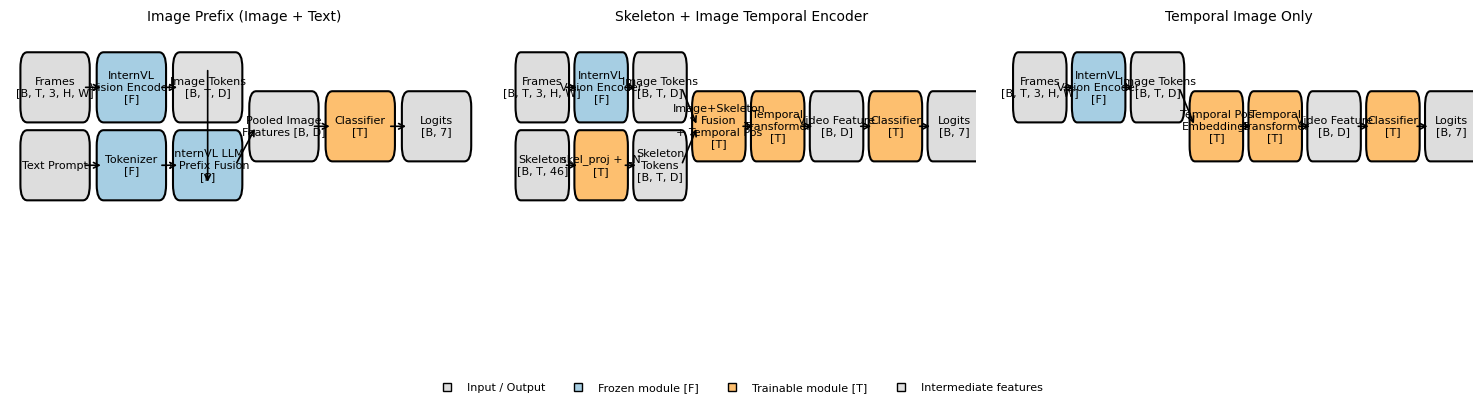

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.lines import Line2D

# Simple helper to draw a box with label
def box(ax, xy, w, h, text, fc, ec="black"):
    x, y = xy
    rect = FancyBboxPatch(
        (x, y),
        w,
        h,
        boxstyle="round,pad=0.2",
        linewidth=1.5,
        edgecolor=ec,
        facecolor=fc,
    )
    ax.add_patch(rect)
    ax.text(
        x + w / 2,
        y + h / 2,
        text,
        ha="center",
        va="center",
        fontsize=8,
        wrap=True,
    )

def arrow(ax, x1, y1, x2, y2):
    ax.annotate(
        "",
        xy=(x2, y2),
        xytext=(x1, y1),
        arrowprops=dict(arrowstyle="->", lw=1.2),
    )

# Colors
clr_input = "#DDDDDD"       # grey
clr_frozen = "#A6CEE3"      # blue-ish
clr_train = "#FDBF6F"       # orange-ish
clr_data = "#E0E0E0"

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
titles = [
    "Image Prefix (Image + Text)",
    "Skeleton + Image Temporal Encoder",
    "Temporal Image Only",
]

# -------------------- 1) Image Prefix --------------------
ax = axes[0]
ax.set_title(titles[0], fontsize=10)

# Layout coordinates
w, h = 1.6, 0.5
y0 = 3.5

# Inputs
box(ax, (0, y0), w, h, "Frames\n[B, T, 3, H, W]", clr_input)
box(ax, (0, y0-1.0), w, h, "Text Prompt", clr_input)

# Vision encoder
box(ax, (2.2, y0), w, h, "InternVL\nVision Encoder\n[F]", clr_frozen)
arrow(ax, 0+w, y0+h/2, 2.2, y0+h/2)

# Image tokens
box(ax, (4.4, y0), w, h, "Image Tokens\n[B, T, D]", clr_data)
arrow(ax, 2.2+w, y0+h/2, 4.4, y0+h/2)

# Tokenizer
box(ax, (2.2, y0-1.0), w, h, "Tokenizer\n[F]", clr_frozen)
arrow(ax, 0+w, y0-1.0+h/2, 2.2, y0-1.0+h/2)

# LLM + prefix fusion
box(ax, (4.4, y0-1.0), w, h, "InternVL LLM\n+ Prefix Fusion\n[F]", clr_frozen)
arrow(ax, 2.2+w, y0-1.0+h/2, 4.4, y0-1.0+h/2)
arrow(ax, 4.4+w/2, y0+h, 4.4+w/2, y0-1.0)  # image tokens -> LLM

# Pooled image features
box(ax, (6.6, y0-0.5), w, h, "Pooled Image\nFeatures [B, D]", clr_data)
arrow(ax, 4.4+w, y0-1.0+h/2, 6.6, y0-0.5+h/2)

# Classifier
box(ax, (8.8, y0-0.5), w, h, "Classifier\n[T]", clr_train)
arrow(ax, 6.6+w, y0-0.5+h/2, 8.8, y0-0.5+h/2)

# Output
box(ax, (11.0, y0-0.5), w, h, "Logits\n[B, 7]", clr_input)
arrow(ax, 8.8+w, y0-0.5+h/2, 11.0, y0-0.5+h/2)

ax.set_xlim(-0.5, 13)
ax.set_ylim(0, 4.5)
ax.axis("off")

# -------------------- 2) Skeleton + Image Temporal --------------------
ax = axes[1]
ax.set_title(titles[1], fontsize=10)

y0 = 3.5

# Inputs
box(ax, (0, y0), w, h, "Frames\n[B, T, 3, H, W]", clr_input)
box(ax, (0, y0-1.0), w, h, "Skeleton\n[B, T, 46]", clr_input)

# Vision encoder (frozen)
box(ax, (2.2, y0), w, h, "InternVL\nVision Encoder\n[F]", clr_frozen)
arrow(ax, 0+w, y0+h/2, 2.2, y0+h/2)

# Image tokens
box(ax, (4.4, y0), w, h, "Image Tokens\n[B, T, D]", clr_data)
arrow(ax, 2.2+w, y0+h/2, 4.4, y0+h/2)

# Skeleton projection (trainable)
box(ax, (2.2, y0-1.0), w, h, "skel_proj + LN\n[T]", clr_train)
arrow(ax, 0+w, y0-1.0+h/2, 2.2, y0-1.0+h/2)

box(ax, (4.4, y0-1.0), w, h, "Skeleton\nTokens\n[B, T, D]", clr_data)
arrow(ax, 2.2+w, y0-1.0+h/2, 4.4, y0-1.0+h/2)

# Fusion + temporal
box(ax, (6.6, y0-0.5), w, h, "Image+Skeleton\nFusion\n+ Temporal Pos\n[T]", clr_train)
arrow(ax, 4.4+w, y0+h/2, 6.6, y0-0.5+h/2)    # from image tokens
arrow(ax, 4.4+w, y0-1.0+h/2, 6.6, y0-0.5+h/2) # from skeleton tokens

box(ax, (8.8, y0-0.5), w, h, "Temporal\nTransformer\n[T]", clr_train)
arrow(ax, 6.6+w, y0-0.5+h/2, 8.8, y0-0.5+h/2)

# Pooled video feature
box(ax, (11.0, y0-0.5), w, h, "Video Feature\n[B, D]", clr_data)
arrow(ax, 8.8+w, y0-0.5+h/2, 11.0, y0-0.5+h/2)

# Classifier
box(ax, (13.2, y0-0.5), w, h, "Classifier\n[T]", clr_train)
arrow(ax, 11.0+w, y0-0.5+h/2, 13.2, y0-0.5+h/2)

# Output
box(ax, (15.4, y0-0.5), w, h, "Logits\n[B, 7]", clr_input)
arrow(ax, 13.2+w, y0-0.5+h/2, 15.4, y0-0.5+h/2)

ax.set_xlim(-0.5, 17)
ax.set_ylim(0, 4.5)
ax.axis("off")

# -------------------- 3) Temporal Image Only --------------------
ax = axes[2]
ax.set_title(titles[2], fontsize=10)

y0 = 3.5

# Input
box(ax, (0, y0), w, h, "Frames\n[B, T, 3, H, W]", clr_input)

# Vision encoder (frozen)
box(ax, (2.2, y0), w, h, "InternVL\nVision Encoder\n[F]", clr_frozen)
arrow(ax, 0+w, y0+h/2, 2.2, y0+h/2)

# Image tokens
box(ax, (4.4, y0), w, h, "Image Tokens\n[B, T, D]", clr_data)
arrow(ax, 2.2+w, y0+h/2, 4.4, y0+h/2)

# Temporal pos + Transformer (trainable)
box(ax, (6.6, y0-0.5), w, h, "Temporal Pos\nEmbeddings\n[T]", clr_train)
arrow(ax, 4.4+w, y0+h/2, 6.6, y0-0.5+h/2)

box(ax, (8.8, y0-0.5), w, h, "Temporal\nTransformer\n[T]", clr_train)
arrow(ax, 6.6+w, y0-0.5+h/2, 8.8, y0-0.5+h/2)

# Pooled video feature
box(ax, (11.0, y0-0.5), w, h, "Video Feature\n[B, D]", clr_data)
arrow(ax, 8.8+w, y0-0.5+h/2, 11.0, y0-0.5+h/2)

# Classifier + output
box(ax, (13.2, y0-0.5), w, h, "Classifier\n[T]", clr_train)
arrow(ax, 11.0+w, y0-0.5+h/2, 13.2, y0-0.5+h/2)

box(ax, (15.4, y0-0.5), w, h, "Logits\n[B, 7]", clr_input)
arrow(ax, 13.2+w, y0-0.5+h/2, 15.4, y0-0.5+h/2)

ax.set_xlim(-0.5, 17)
ax.set_ylim(0, 4.5)
ax.axis("off")

# -------------------- Legend --------------------
legend_elements = [
    Line2D([0], [0], color="none", marker="s", markerfacecolor=clr_input, label="Input / Output"),
    Line2D([0], [0], color="none", marker="s", markerfacecolor=clr_frozen, label="Frozen module [F]"),
    Line2D([0], [0], color="none", marker="s", markerfacecolor=clr_train, label="Trainable module [T]"),
    Line2D([0], [0], color="none", marker="s", markerfacecolor=clr_data, label="Intermediate features"),
]
fig.legend(
    handles=legend_elements,
    loc="lower center",
    ncol=4,
    fontsize=8,
    frameon=False,
    bbox_to_anchor=(0.5, -0.02),
)

plt.tight_layout()
plt.show()